In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydot
import seaborn as sea

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

%matplotlib inline

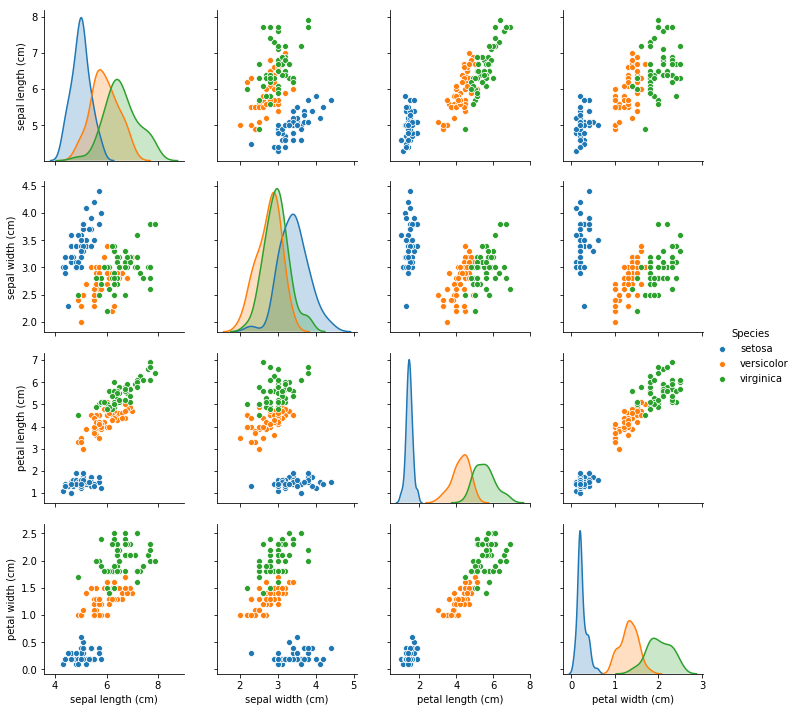

In [2]:
# Generate a pairplot matrix to ascertain whether classes are linearly separable
iris_data_prepped = datasets.load_iris()
dataframe = pd.DataFrame(iris_data_prepped.data, columns=iris_data_prepped.feature_names)
dataframe['Species'] = np.array([iris_data_prepped.target_names[i] for i in iris_data_prepped.target])

sea.pairplot(dataframe, hue='Species')

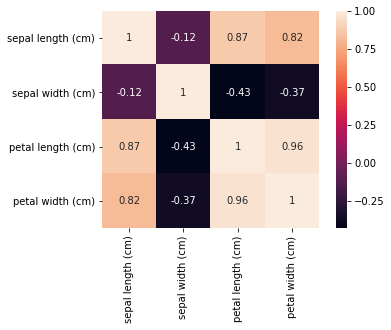

In [3]:
# Further visualisation
correlation_matrix = dataframe.corr()
sea.heatmap(correlation_matrix, annot=True, square=True)

In [4]:
iris_data = pd.read_csv('iris.csv')

In [5]:
# Demonstrates all columns have identical row count, no immediately anomalous data points such as 0s in columns
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


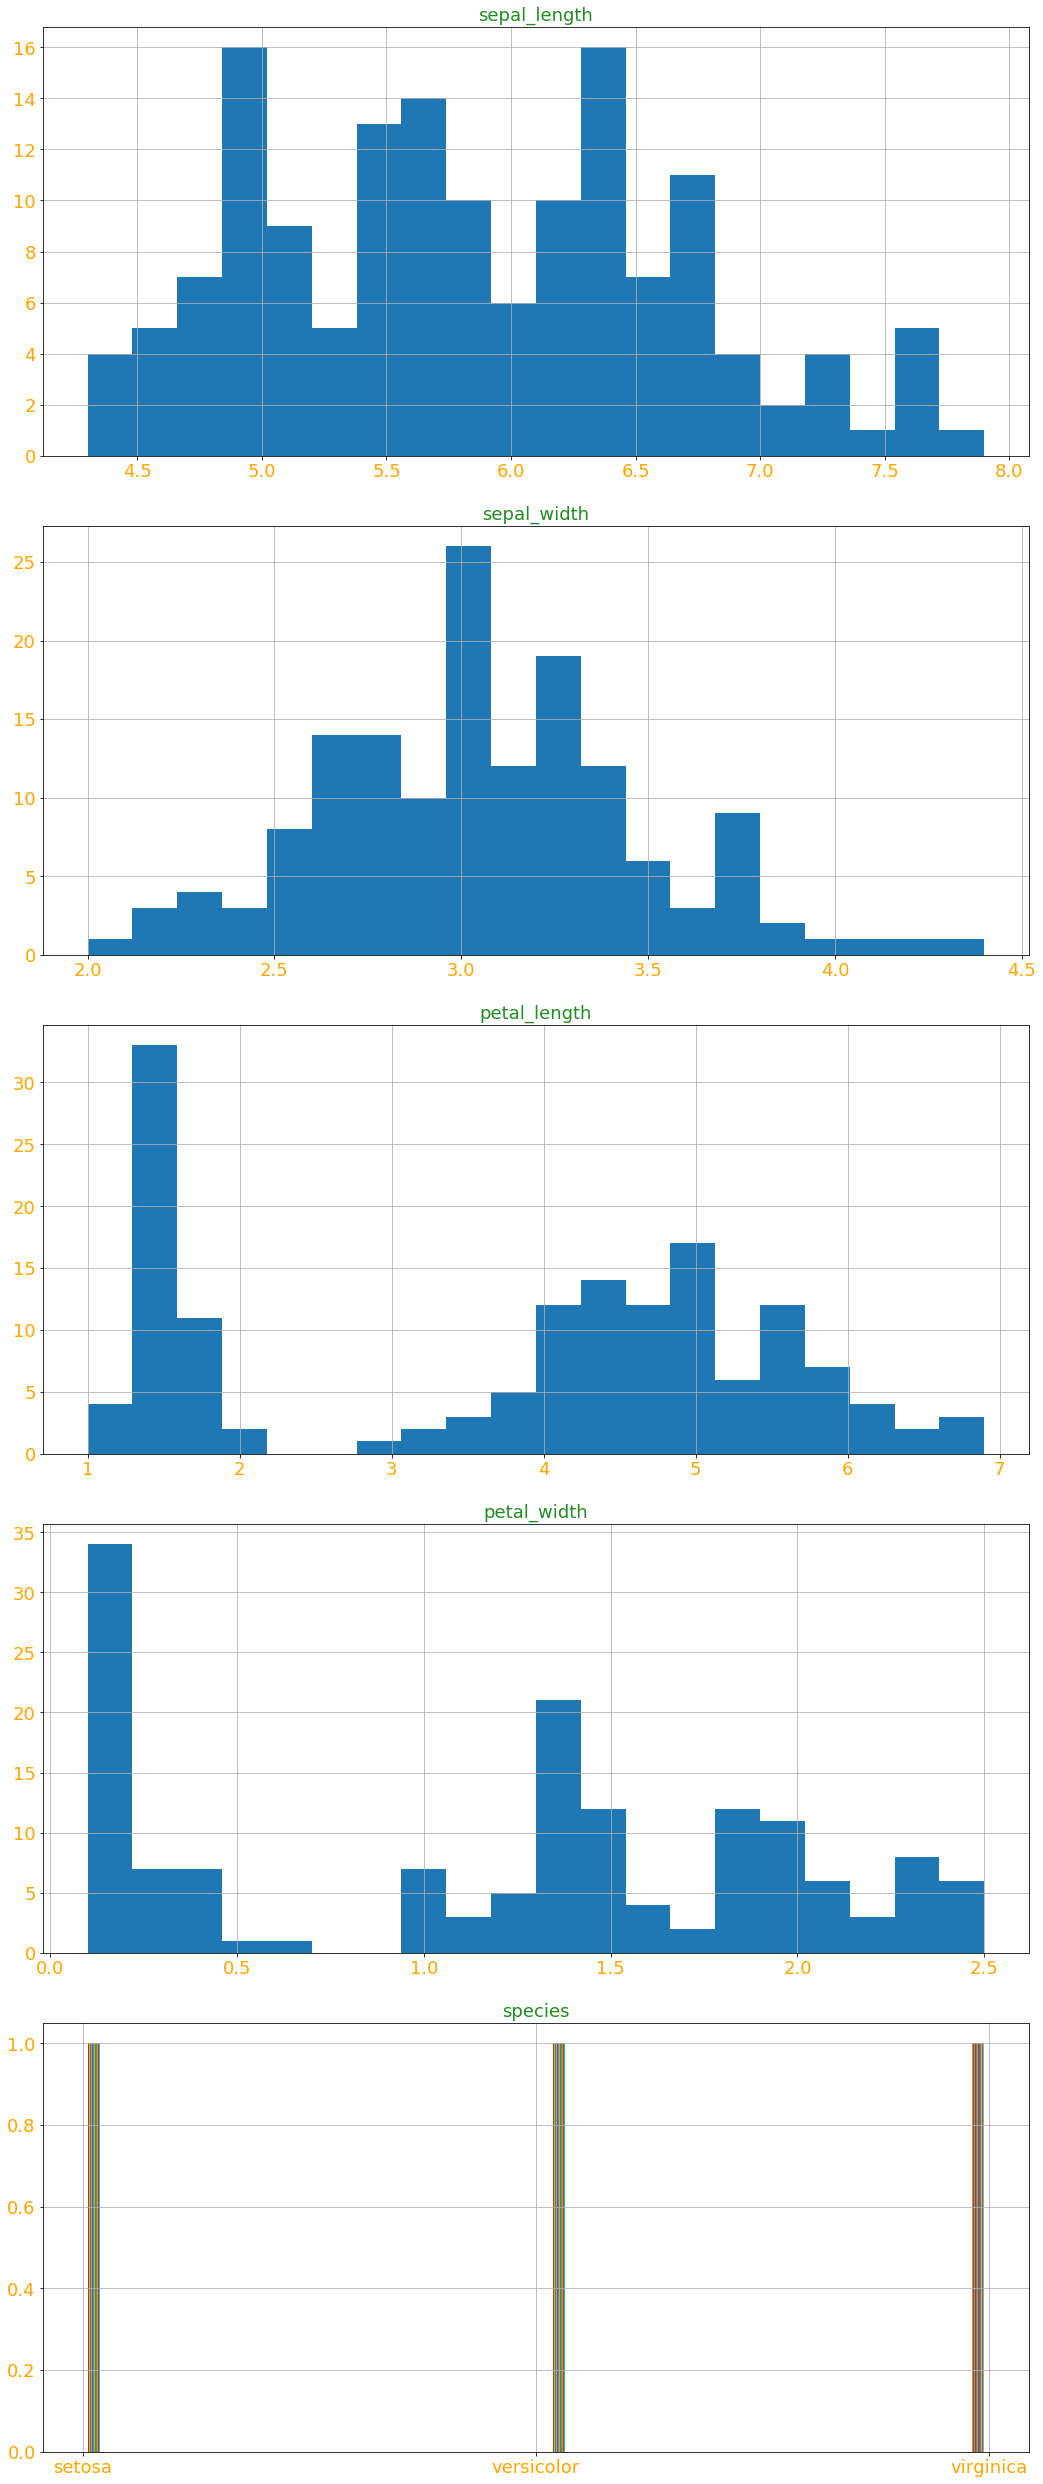

In [6]:
# Create histograms and graphs to visualise data and ascertain absence of immediately anomalous data points such as blatant outliers or oddly missing points.
colour_bar = 'cadetblue'
colour_title = 'forestgreen'
font_size = 18
label_colour = 'orange'
label_size = 18
n_bins = 20

fig, axes = plt.subplots(len(iris_data.columns),figsize=(15,35))
for n, col in enumerate(iris_data.columns):
    iris_data[col].hist(ax=axes[n], bins=n_bins)
    axes[n].set_title(label=col, fontsize=font_size, color=colour_title)
    axes[n].tick_params(axis='both', labelsize=label_size, labelcolor=label_colour)
    
fig.tight_layout(pad=2.5)

In [7]:
iris_dataframe = pd.DataFrame(iris_data)
# One-hot encode the 'Species' column to ensure all the data is in integer form
iris_data_dummied = pd.get_dummies(iris_dataframe)

In [8]:
labels = np.array(iris_data_dummied[['species_setosa', 'species_versicolor', 'species_virginica']])
iris_data_dummied = iris_data_dummied.drop(['species_setosa', 'species_versicolor', 'species_virginica'], axis=1)
iris_column_names_list = list(iris_data_dummied.columns)
iris_data_numpyed = np.array(iris_data_dummied)

In [9]:
# Split the data into training and test sets, ensure proper data distribution & randomisation data between them
train_iris_data, test_iris_data, train_labels, test_labels = train_test_split(iris_data_numpyed, labels, test_size=0.24, random_state=42)

In [10]:
# Expectation - training datasets have same number of columns between them as do testing datasets
print('Training Dataset Shape:', train_iris_data.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Dataset Shape:', test_iris_data.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Dataset Shape: (114, 4)
Training Labels Shape: (114, 3)
Testing Dataset Shape: (36, 4)
Testing Labels Shape: (36, 3)


In [11]:
# We anticipate a relationship between the prediction value and the values in the dataset & during training the model's job is to learn these relationships.
random_forest = RandomForestClassifier(n_estimators=1000, random_state=42)
random_forest.fit(train_iris_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [12]:
# Make and compare predictions on the test data so we can evaluate it
predictions = random_forest.predict(test_iris_data)
errors = abs(predictions - test_labels)

print('Mean absolute error:', round(np.mean(errors), 2), 'degrees.')

Mean absolute error: 0.0 degrees.


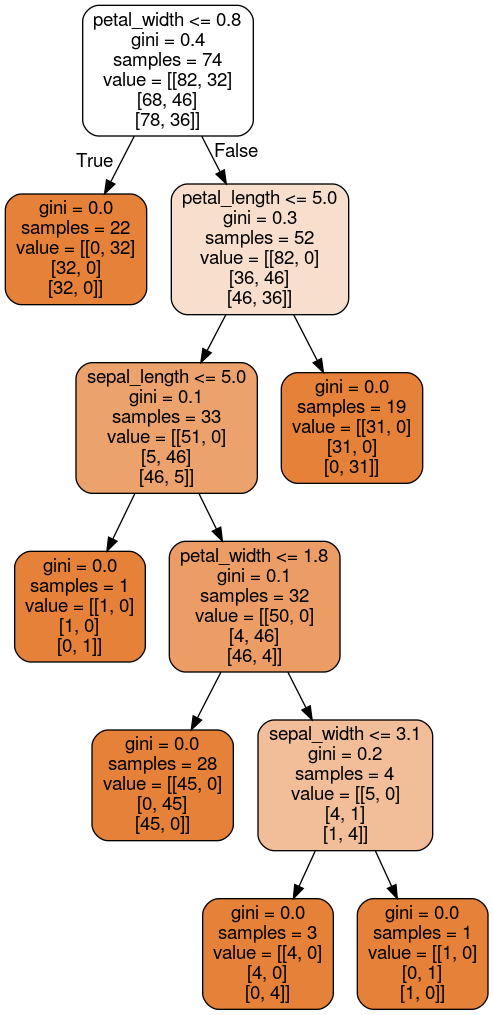

In [13]:
# Pull out one tree for a closer look
tree = random_forest.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names=iris_column_names_list, filled=True, rounded=True, precision=1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

Image('tree.png')

In [14]:
# Look at accuracy
print('Iris model accuracy:', tree.score(test_iris_data, test_labels))

Iris model accuracy: 1.0
